<a href="https://colab.research.google.com/github/aditya129712/Churn-Modelling-using-Fully-Connected-Layer/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fully connected layer

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

## Feature engineering

In [5]:
#Create the Dummy variables
Geography = pd.get_dummies(X["Geography"], drop_first = True)
Gender = pd.get_dummies(X["Gender"], drop_first = True)


In [6]:
## Concatenate the Data Frames

X = pd.concat([X,Geography,Gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Creating the Fully connected layer (ANN)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [11]:
# Intialising the ANN
Classifier = Sequential()

In [15]:
#create the first input layer
Classifier.add(Dense(units=11,activation='relu'))

In [16]:
#create the first hidden layer
Classifier.add(Dense(units=6,activation='relu'))

In [17]:
#create the output layer
Classifier.add(Dense(units=1,activation='sigmoid'))

In [19]:
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [21]:
model_history=Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=30,callbacks=early_stopping)

Epoch 1/30
536/536 [==============================] - 3s 4ms/step - loss: 0.4767 - accuracy: 0.7845 - val_loss: 0.4452 - val_accuracy: 0.7970
Epoch 2/30
536/536 [==============================] - 2s 3ms/step - loss: 0.4174 - accuracy: 0.8164 - val_loss: 0.4057 - val_accuracy: 0.8243


In [22]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
import matplotlib.pyplot as plt

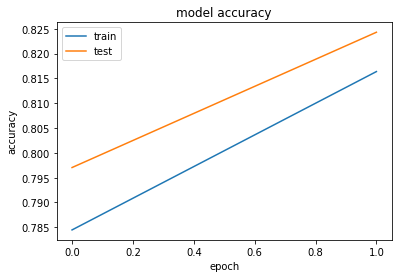

In [25]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

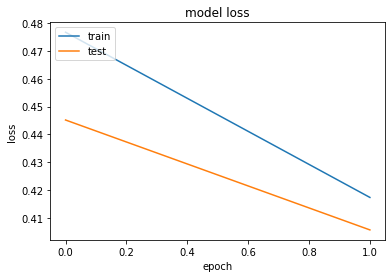

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making the predictions and evaluating the model

In [28]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1563,   32],
       [ 311,   94]])

In [30]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [31]:
score

0.8285